# Heroes of Pymoli

## Observable Trends:
 - Males are more likely to make purchases than other genders, accounting for over 80 % of the total purchases made
 - However, males are lower spenders. While they account for 84% of the purchases made, they account for less than 83% of purchases made, and have the lowest average purchase total per person. This suggests that genders besides male is an untapped market that breaking into could generate considerably more sales.
 - Those players who are less than 10 or in the 20-24 age range have the largest average purchase total per person. However, the 20-24 age range has considerably more players so the majority of the total revenue is from that age group.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Create a file path to read into a dataframe
rawdata = pd.read_csv("purchase_data.csv")
rawdata.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Player Count

In [3]:
# How many players bought stuff?

player_count_df = pd.DataFrame({
    "Total Players" : rawdata['SN'].nunique()
}, index=[0])

player_count_df

,Total Players
0,576


## Purchasing Analysis (Total)

In [4]:
# create variables for readability

# How many different items sold?
nu = rawdata['Item ID'].nunique()

# Find the average cost
ap = rawdata['Price'].mean()

# How many purchases were made in total?
np = rawdata['Purchase ID'].nunique()

# Find total revenue
tr = rawdata['Price'].sum()

purchasing_analysis_df = pd.DataFrame({
    "Number of Unique Items" : nu, 
    "Average Price" : ap,
    "Number of Purchases" : np,
    "Total Revenue" : tr
}, index = [""])

purchasing_analysis_df["Average Price"] = purchasing_analysis_df["Average Price"].astype(float).map("${:,.2f}".format)
purchasing_analysis_df["Total Revenue"] = purchasing_analysis_df["Total Revenue"].astype(float).map("${:,.2f}".format)

purchasing_analysis_df


,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
,179,$3.05,780,"$2,379.77"


# Gender Demographics

In [5]:
# create variables for readability

# find total number of players of each gender
tc = rawdata[["SN", "Gender"]].drop_duplicates().Gender.value_counts()

# Find percentage of players by gender
pp = rawdata[["SN", "Gender"]].drop_duplicates().Gender.value_counts(normalize = True).astype(float).map("{:.2%}".format)
gen_dem_df = pd.DataFrame({
    "Total Count" : tc, 
    "Percentage of Players" : pp
})

gen_dem_df

,Total Count,Percentage of Players
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


## Purchasing Analysis (Gender)

In [6]:
#create variables for readability

# purchase count
pc = rawdata.groupby("Gender")["Purchase ID"].count()

# average price
ap = rawdata.groupby("Gender")["Price"].mean().astype(float).map("${:,.2f}".format)

# total revenue by gender
tr = rawdata.groupby("Gender")["Price"].sum().astype(float).map("${:,.2f}".format)

# average price per person in each gender
ap_p = (rawdata.groupby("Gender")["Price"].sum() / 
    rawdata.groupby("Gender")["SN"].nunique()).astype(float).map("${:,.2f}".format)

gen_purch_df = pd.DataFrame({
    "Purchase Count" : pc,
    "Average Purchase Price" : ap, 
    "Total Purchase Value" : tr, 
    "Average Purchase Total per Person" : ap_p
})

gen_purch_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Average Purchase Total per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demografics

In [7]:
#I know the max is 45, but this way the program will work even if older people buy things
age_bins = [0, 9.9, 14.9, 19.9, 24.9, 29.9, 34.9, 39.9, 44.9, 49.9, 54.9, 59.9,\
            64.9, 69.9, 74.9, 79.9, 84.9, 89.9, 94.9, 99.9, 99999]
age_groups = ["Less than 10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", \
              "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", "94-99", "Over 100"]

In [8]:
# Separate the data by the specified age groups above

rawdata["Age Range"] = pd.cut(rawdata["Age"], age_bins, labels = age_groups, include_lowest = True)

In [9]:
# create variables for readability

# purchase count
pc = rawdata.groupby("Age Range")["Purchase ID"].count()

# average price
ap = rawdata.groupby("Age Range")["Price"].mean().astype(float).map("${:,.2f}".format)

# total revenue
tr = rawdata.groupby("Age Range")["Price"].sum().astype(float).map("${:,.2f}".format)

# average price per person
ap_p = (rawdata.groupby("Age Range")["Price"].sum() / 
    rawdata.groupby("Age Range")["SN"].nunique()).astype(float).map("${:,.2f}".format)

age_dem_df = pd.DataFrame({
    "Purchase Count" : pc,
    "Average Purchase Price" : ap, 
    "Total Purchase Value" : tr, 
    "Average Purchase Total per Person" : ap_p
})

age_dem_df.head()

,Purchase Count,Average Purchase Price,Total Purchase Value,Average Purchase Total per Person
Age Range,,,,
Less than 10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81


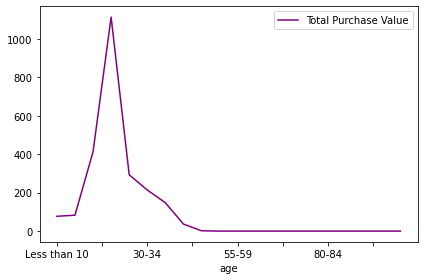

In [21]:
# create variables for readability

# purchase count
npc = rawdata.groupby("Age Range")["Purchase ID"].count()

# average price
nap = rawdata.groupby("Age Range")["Price"].mean()

# total revenue
ntr = rawdata.groupby("Age Range")["Price"].sum()

# average price per person
nap_p = (rawdata.groupby("Age Range")["Price"].sum() / 
    rawdata.groupby("Age Range")["SN"].nunique())

byage_df = pd.DataFrame({
    "Purchase Count" : npc,
    "Average Purchase Price" : nap, 
    "Total Purchase Value" : ntr, 
    "Average Purchase Total per Person" : nap_p
})

new_age_df = pd.DataFrame(byage_df, columns = ['Total Purchase Value'])

new_age_df.plot(color = 'purple').set_xlabel('age')
plt.tight_layout()
plt.savefig('purchase.png')
plt.show()


## Top Spenders

In [11]:
# create variables for readability

# purchase count
pc = rawdata.groupby("SN")["Purchase ID"].count()
# average purchase price
app = rawdata.groupby("SN")["Price"].mean().astype(float).map("${:,.2f}".format)
# total purchase value
tpv = rawdata.groupby("SN")["Price"].sum()

# create dataframe with information

top_df = pd.DataFrame({
    "Purchase Count" : pc,
    "Average Purchase Price" : app, 
    "Total Purchase Value" : tpv
})

top_df = top_df.sort_values(["Total Purchase Value"], ascending = False)
top_df["Total Purchase Value"] = top_df["Total Purchase Value"].map("${:.2f}".format)
top5_df = top_df.head(5)
top5_df

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most popular items

In [12]:
# create variables for readability

# purchase count
pc = rawdata.groupby(["Item ID", "Item Name"])["Purchase ID"].count()

# item price
it = rawdata.groupby(["Item ID", "Item Name"])["Price"].mean()

# total revenue
tr = rawdata.groupby(["Item ID", "Item Name"])["Price"].sum()

pop_item_df = pd.DataFrame({
    "Purchase Count" : pc,
    "Item Price" : it, 
    "Total Purchase Value" : tr
})



pop_items_df = pop_item_df.sort_values(["Purchase Count"], ascending = False)
pop_items_df["Item Price"] = pop_item_df["Item Price"].astype(float).map("${:.2f}".format)
pop_items_df["Total Purchase Value"] = pop_item_df["Total Purchase Value"].astype(float).map("${:.2f}".format)

pop5_df = pop_items_df.head(5)

pop5_df



,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
132,Persuasion,9,$3.22,$28.99
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77


## Most Profitable Items

In [13]:
# start with the same dataframe as most popular, but sort by total purchase value instead of purchase count

prof_items_df = pop_item_df.sort_values(["Total Purchase Value"], ascending = False)
prof_items_df["Item Price"] = prof_items_df["Item Price"].astype(float).map("${:.2f}".format)
prof_items_df["Total Purchase Value"] = prof_items_df["Total Purchase Value"].astype(float).map("${:.2f}".format)

prof5_df = prof_items_df.head(5)

prof5_df

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
103,Singed Scalpel,8,$4.35,$34.80
